In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

/Users/QDAI8/opt/miniconda3/envs/dl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the pickle files
scaled_train = pd.read_pickle("scaled_train.pkl")
scaled_test = pd.read_pickle("scaled_test.pkl")

In [3]:
# Generate sequences for train and test sets
feature_columns = scaled_train.drop(columns=['projid', 'study', 'fu_year', 'cogdx', 
                                             'amyloid', 'gpath', 'tangles', 'niareagansc']).columns.tolist()
target_columns = ['gpath', 'tangles', 'niareagansc']

train_ids = scaled_train.projid.unique()
train_sequences = utils.create_sequences(scaled_train, train_ids, feature_columns, target_columns)

test_ids = scaled_test.projid.unique()
test_sequences = utils.create_sequences(scaled_test, test_ids, feature_columns, target_columns)

# Check selected parameters for gpath

In [4]:
# Select the best hyperparameters based on the 'gpath' column
cv_results = pd.read_csv('lstm_hyperparameter_results.csv')
best_hyperparams_df = cv_results.sort_values(by='gpath', ascending=False)
best_hyperparams_df

,hidden_size,num_layers,learning_rate,batch_size,dropout_rate,gpath,tangles,niareagansc
194,8,2,0.005,8,0.5,0.259080,0.316983,0.245723
424,16,4,0.010,16,0.2,0.244531,0.298157,0.233360
339,16,2,0.005,8,0.6,0.241064,0.322325,0.229783
192,8,2,0.005,8,0.2,0.240149,0.312940,0.230391
181,8,2,0.001,8,0.4,0.239174,0.308521,0.217281
...,...,...,...,...,...,...,...,...
263,8,4,0.001,32,0.6,0.041353,0.061894,0.064432
131,4,4,0.005,32,0.6,0.035704,0.035676,0.017687
111,4,4,0.001,8,0.6,0.028543,0.052987,0.025563
115,4,4,0.001,16,0.6,0.027565,0.039629,0.017724


In [5]:
# Call evaluate_on_test with the selected hyperparameters
test_r2, train_loss, val_loss, lr_history = utils.train_and_evaluate_model(
    train_data=train_sequences,
    test_data=test_sequences,
    input_dim=57,
    output_dim=len(target_columns),  
    num_epochs=500,
    patience=10,
    lr_scheduler_patience=5,
    lr_factor=0.5,
    hidden_size=int(best_hyperparams_df['hidden_size'].iloc[0]),
    num_layers=int(best_hyperparams_df['num_layers'].iloc[0]),
    batch_size=int(best_hyperparams_df['batch_size'].iloc[0]),
    learning_rate=best_hyperparams_df['learning_rate'].iloc[0],
    seed=1217,
    model_save_path="best_model.pth",
    dropout_rate=best_hyperparams_df['dropout_rate'].iloc[0]
)

In [6]:
test_r2

[0.3083143024806296, 0.3844815457647451, 0.3240357610224476]

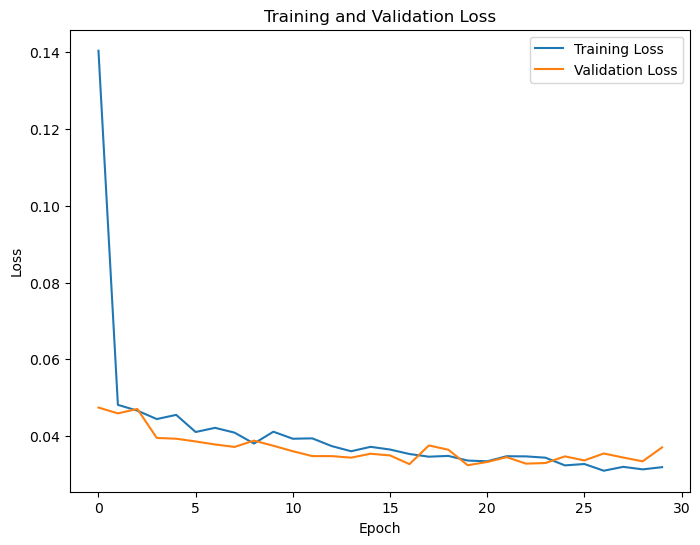

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Check selected parameters for tangles

In [9]:
best_hyperparams_df = cv_results.sort_values(by='tangles', ascending=False).head(10)
best_hyperparams_df

,hidden_size,num_layers,learning_rate,batch_size,dropout_rate,gpath,tangles,niareagansc
240,8,3,0.010,8,0.2,0.235290,0.324177,0.223864
339,16,2,0.005,8,0.6,0.241064,0.322325,0.229783
211,8,2,0.010,16,0.6,0.211019,0.317506,0.204248
194,8,2,0.005,8,0.5,0.259080,0.316983,0.245723
205,8,2,0.010,8,0.4,0.229342,0.316113,0.229102
312,16,1,0.010,8,0.2,0.215897,0.315605,0.199614
315,16,1,0.010,8,0.6,0.215897,0.315605,0.199614
314,16,1,0.010,8,0.5,0.215897,0.315605,0.199614
313,16,1,0.010,8,0.4,0.215897,0.315605,0.199614
372,16,3,0.005,8,0.2,0.233052,0.315104,0.199134


In [10]:
# Call evaluate_on_test with the selected hyperparameters
test_r2, train_loss, val_loss, lr_history = utils.train_and_evaluate_model(
    train_data=train_sequences,
    test_data=test_sequences,
    input_dim=57,
    output_dim=len(target_columns),  
    num_epochs=500,
    patience=10,
    lr_scheduler_patience=5,
    lr_factor=0.5,
    hidden_size=int(best_hyperparams_df['hidden_size'].iloc[0]),
    num_layers=int(best_hyperparams_df['num_layers'].iloc[0]),
    batch_size=int(best_hyperparams_df['batch_size'].iloc[0]),
    learning_rate=best_hyperparams_df['learning_rate'].iloc[0],
    seed=1217,
    model_save_path="best_model.pth",
    dropout_rate=best_hyperparams_df['dropout_rate'].iloc[0]
)

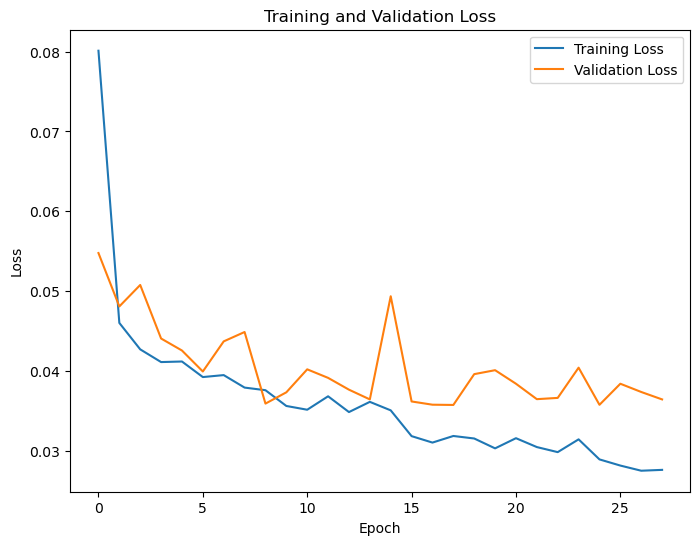

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [12]:
test_r2

[0.30692468958487, 0.3478255059059728, 0.3187868915090125]